In [2]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
from experiment import Experiment
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)   


Accuracy: 0.49
Attack Accruracy: 0.52
Normal Accuracy: 0.59
F1 Score: 0.38
F1 Score Attack: 0.43
F1 Score Normal: 0.58
Fit Time: 283.6
Evaluate Time: 0.88


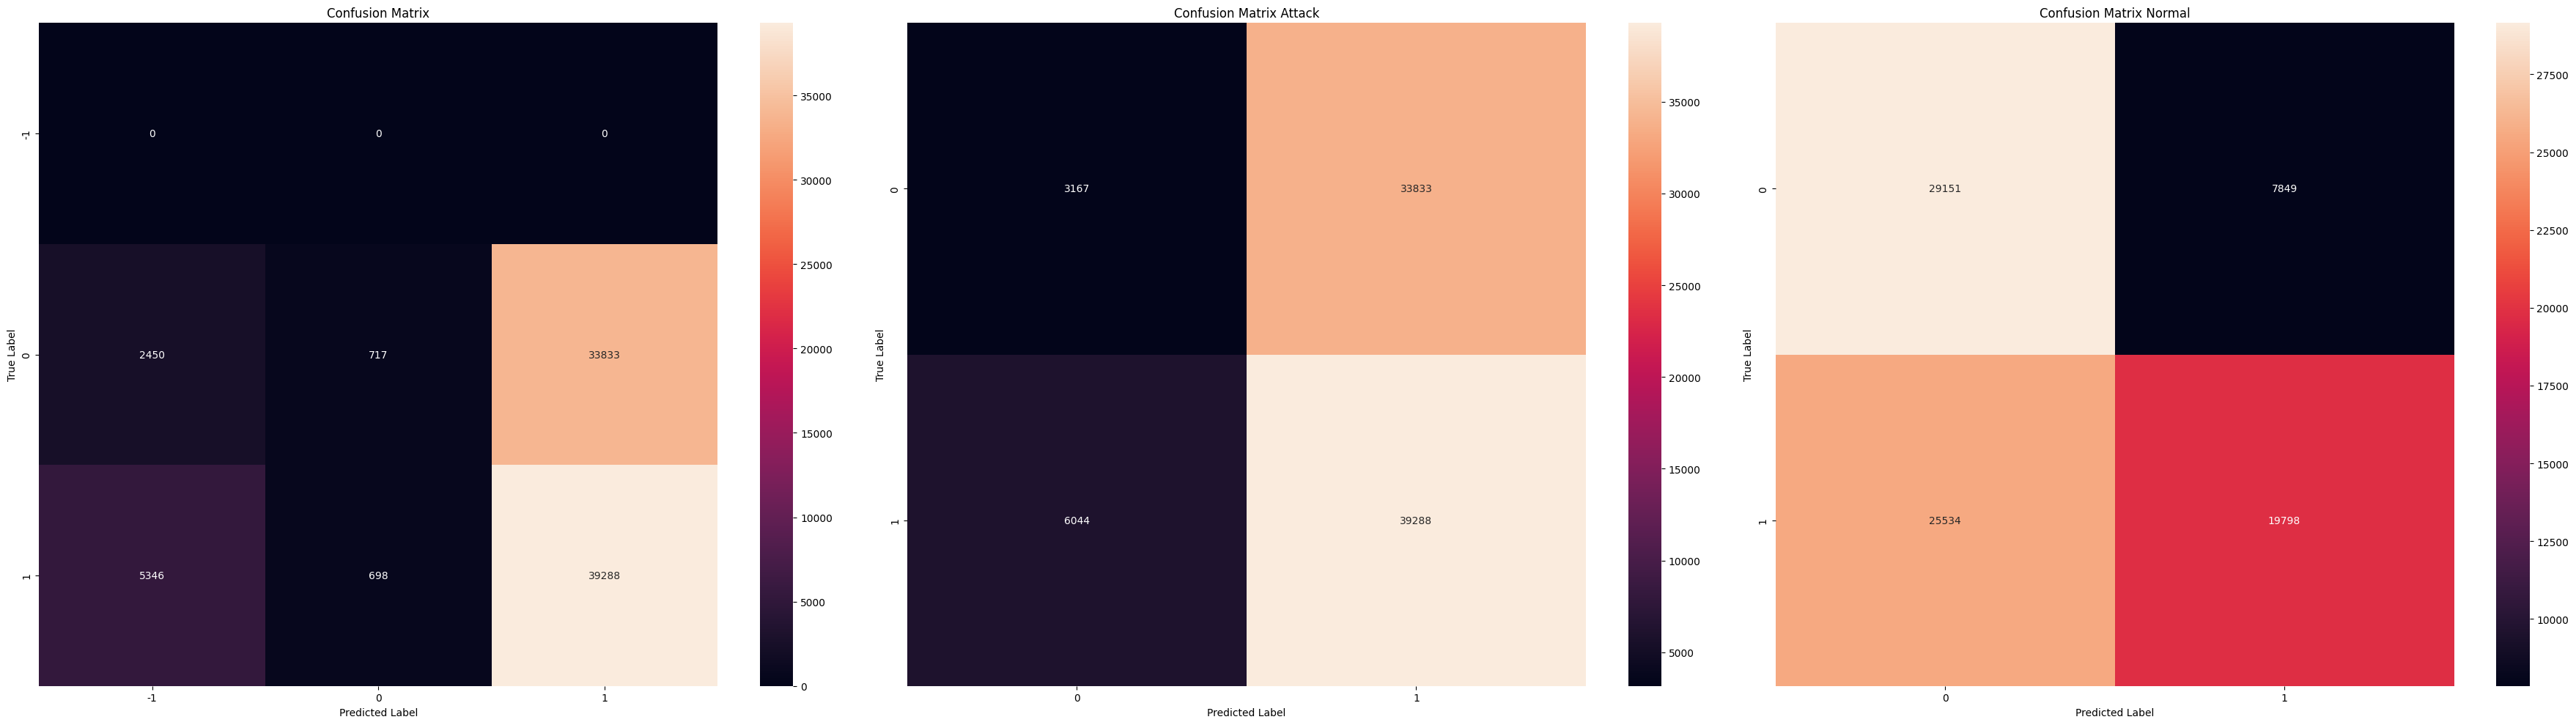

In [3]:
dataset = Dataset_UNSW_NB15(100000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=5000000)
exp.run_hybrid(k=5000000000, n_fi=20, n_pca=20)
exp.run_var(k=50000000000)

Accuracy: 0.53
Attack Accruracy: 0.53
Normal Accuracy: 0.47
F1 Score: 0.4
F1 Score Attack: 0.4
F1 Score Normal: 0.34
Fit Time: 153.02
Evaluate Time: 0.22


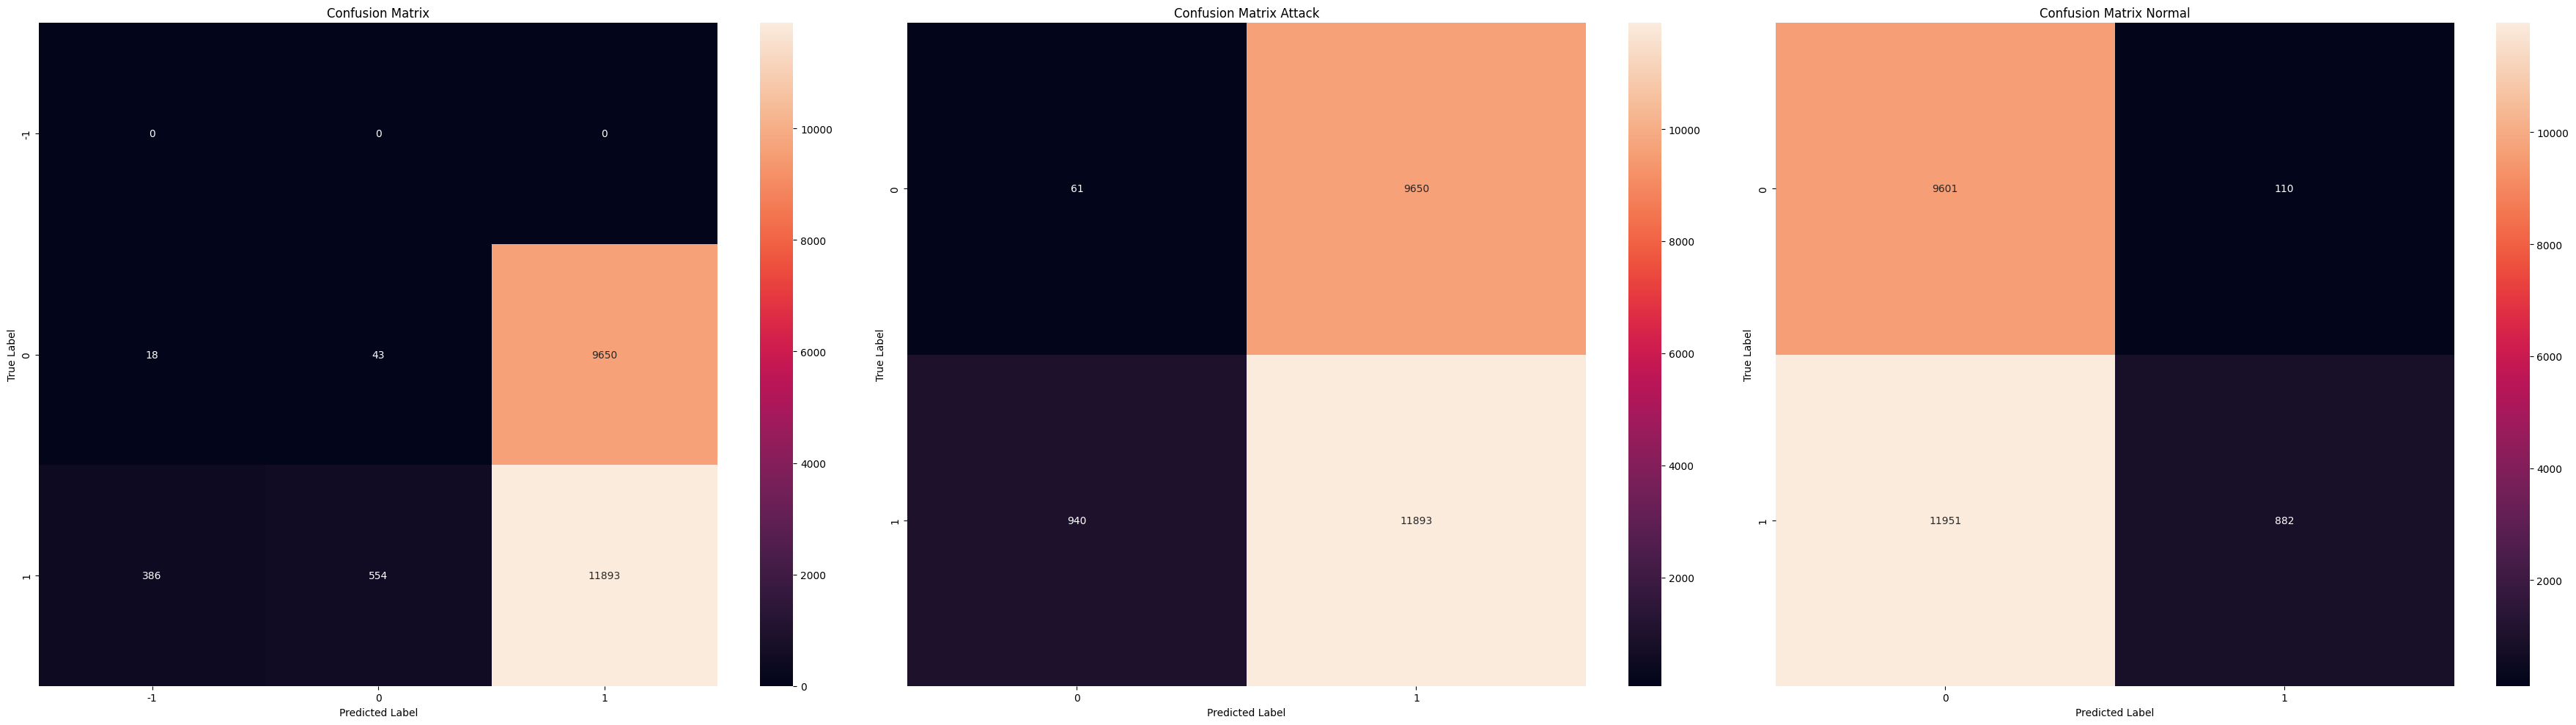

In [5]:
dataset = Dataset_NSL_KDD(1000000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
#exp.run_noFS(k=50)
exp.run_hybrid(k=500, n_fi=20, n_pca=20)
#exp.run_var(k=50)

In [ ]:
dataset = Dataset_IoT_NID(1000000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=50)
exp.run_hybrid(k=50, n_fi=20, n_pca=20)
exp.run_var(k=50)